In [2]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

In [4]:
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [6]:
html = browser.html
soup = soup(html, 'html.parser')

In [9]:
table = soup.find('table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [16]:
headers = [header.text for header in table.find_all('th')]
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [17]:
# lists to store data
data = {header: [] for header in headers}
data

{'id': [],
 'terrestrial_date': [],
 'sol': [],
 'ls': [],
 'month': [],
 'min_temp': [],
 'pressure': []}

In [18]:
# Extract the data rows from the table
rows = table.find_all('tr', class_='data-row')
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

In [38]:
# Finnaly able to use enumerate for something
for row in rows:
    cells = row.find_all('td')
    for i, cell in enumerate(cells):
        data[headers[i]].append(cell.text.strip())
df = pd.DataFrame(data)
# Was having issues with dtypes so I had AI help me trouble shoot. 
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)
df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155.0,6,-75.0,739.0
1,13,2012-08-17,11,156.0,6,-76.0,740.0
2,24,2012-08-18,12,156.0,6,-76.0,741.0
3,35,2012-08-19,13,157.0,6,-74.0,732.0
4,46,2012-08-20,14,157.0,6,-74.0,740.0
...,...,...,...,...,...,...,...
11197,1889,2018-02-23,1973,133.0,5,-78.0,730.0
11198,1892,2018-02-24,1974,134.0,5,-77.0,729.0
11199,1894,2018-02-25,1975,134.0,5,-76.0,729.0
11200,1893,2018-02-26,1976,135.0,5,-77.0,728.0


In [22]:
months_count = df['month'].nunique()
months_count

12

In [24]:
martian_days_count = df['sol'].count()
martian_days_count

5601

Lowest Temp


<Axes: title={'center': 'Average Minimum Daily Temperature by Month'}, xlabel='Month', ylabel='Average Minimum Temperature (C)'>

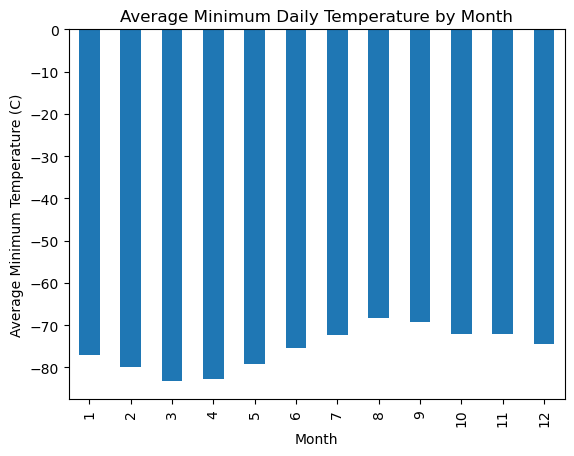

In [33]:
avg_temp = df.groupby('month')['min_temp'].mean()
avg_temp
avg_temp.plot(kind='bar', xlabel='Month', ylabel='Average Minimum Temperature (C)', title='Average Minimum Daily Temperature by Month')

Pressure

<Axes: title={'center': 'Average Daily Atmospheric Pressure by Month'}, xlabel='Month', ylabel='Average Atmospheric Pressure'>

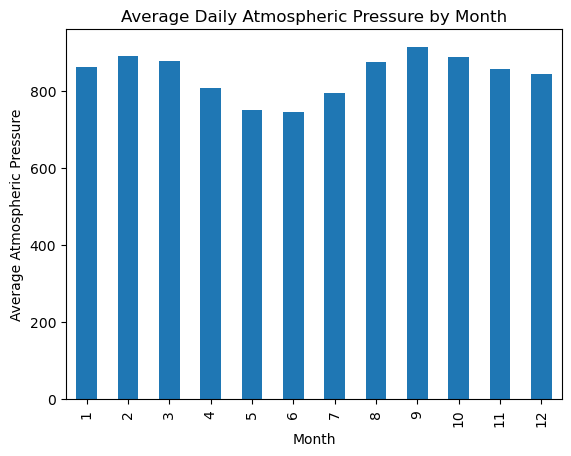

In [34]:
average_pressure = df.groupby('month')['pressure'].mean()


average_pressure.plot(kind='bar', xlabel='Month', ylabel='Average Atmospheric Pressure', title='Average Daily Atmospheric Pressure by Month')

<Axes: title={'center': 'Daily Minimum Temperature'}, xlabel='Terrestrial Date', ylabel='Minimum Temperature (C)'>

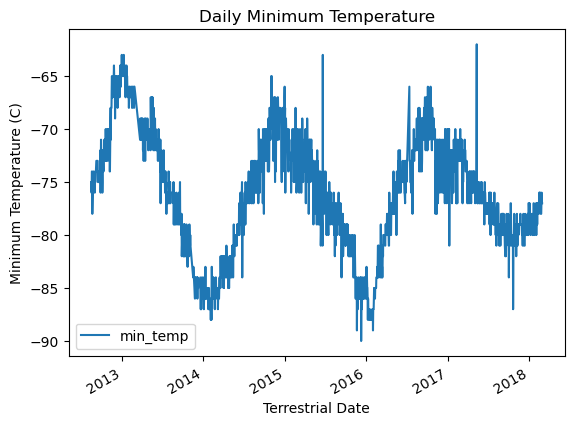

In [35]:
df.plot(x='terrestrial_date', y='min_temp', xlabel='Terrestrial Date', ylabel='Minimum Temperature (C)', title='Daily Minimum Temperature')

Around 600

In [36]:
df.to_csv('mars_weather_data.csv', index=False)

In [37]:
browser.quit()